Recovery time: mean = 6.495, std = 4.109
2.6843292527493885
10.313055474782779
2.2793920919116895


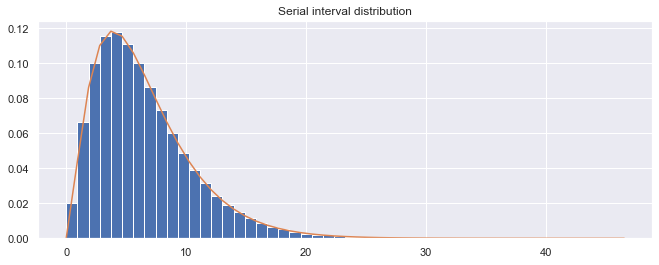

In [37]:
import sys
import numpy as np
import scipy.special as sps
import scipy.stats as st
import pickle
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import init_common as z
import init_spec_gamma as zz
import helpers as hp
from random import sample
from sklearn.utils import shuffle

sns.set(rc={'figure.figsize':(11, 4)})

R0_target = 2.2
N_nodes = 1000000

## 1. add distribution for recovery time / gamma
Trec_mean  = 6.5 # serial interval
Trec_sig = 0.62
m0 = Trec_mean*(Trec_sig**2)
s0 = 1/(Trec_sig**2)
Trec_vec = np.random.gamma(m0,s0,N_nodes)
Trec_mean = np.average(Trec_vec)
gamma_mean = 1/Trec_mean 
cnt,bins,ign=plt.hist(Trec_vec,bins=50,density=True)
plt.plot(bins,st.gamma.pdf(bins,m0,0,s0))
plt.title("Serial interval distribution")
plt.savefig("./calib/Serial_interval_pdf.png")

print("Recovery time: mean = "+str(np.round(Trec_mean,3))+", std = "+str(np.round(np.std(Trec_vec),3)))


R0 for self-isolated: mean = 0.975, std = 0.624
Parameters of fitted Gamma dist:
(2.4536503313939093, 0.0008978573951103487, 0.39687041924465216)


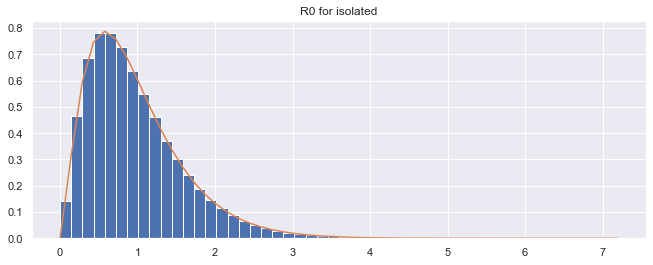

In [38]:
## 2.add distribution for beta 
## 2.A self-isolated
isol_share = 0.7
N_nodes_isol = round(isol_share*N_nodes)
# their beta follows gamma dist. with very small variance
beta_scale = 1000
beta_isol_mean = 0.15
beta_isol = beta_scale*beta_isol_mean
beta_vec_isol = np.random.gamma(beta_isol,1.0/beta_scale,N_nodes_isol)
Trec_isol = Trec_vec[0:N_nodes_isol]
R0_isol_vec = beta_vec_isol*Trec_isol

print("R0 for self-isolated: mean = "+str(np.round(np.mean(R0_isol_vec),3))+
      ", std = "+str(np.round(np.std(R0_isol_vec),3)))

params=st.gamma.fit(R0_isol_vec)
cnt,bins,ign=plt.hist(R0_isol_vec,bins=50,density=True)
plt.plot(bins,st.gamma.pdf(bins,params[0],params[1],params[2]))
print("Parameters of fitted Gamma dist:")
print(params)
plt.title("R0 for isolated")
plt.savefig("./calib/R0_isol_pdf.png")

R0 for non-isolated: mean = 2.661, std = 4.892
R0 (total pop.): mean = 1.481, std = 2.836
1000000


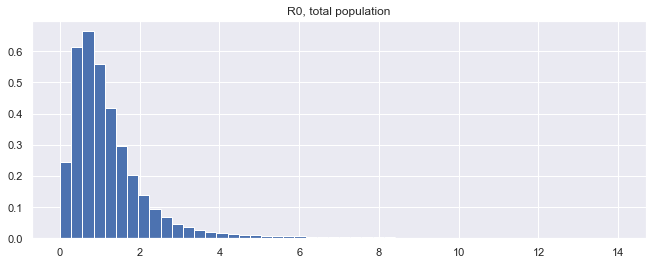

In [93]:
## 2.B non-isolated
a0 = 0.15
a1 = 10
scale_nonisol = 2.45
N_nodes_nonisol = N_nodes-N_nodes_isol
beta_vec_nonisol = hp.power_law_pdf(np.random.uniform(0,1,N_nodes_nonisol),a0,a1,scale_nonisol)
# cnt,bins,ign=plt.hist(beta_vec_nonisol,bins=50,density=True)

Trec_nonisol = Trec_vec[N_nodes_isol:N_nodes]
R0_nonisol_vec = beta_vec_nonisol*Trec_nonisol

print("R0 for non-isolated: mean = "+str(np.round(np.mean(R0_nonisol_vec),3))+
      ", std = "+str(np.round(np.std(R0_nonisol_vec),3)))

## 2.C joint distribution
beta_vec = shuffle(np.transpose([*np.transpose(beta_vec_isol),*np.transpose(beta_vec_nonisol)]),random_state=0)
beta_vec_0 = beta_vec.tolist()

R0_vec = beta_vec*Trec_vec
R0_mean = np.mean(R0_vec)
R0_std = np.std(R0_vec)

print("R0 (total pop.): mean = "+str(np.round(R0_mean,3))+
      ", std = "+str(np.round(R0_std,3)))

R0_max = 14
R0_vec = R0_vec[R0_vec<R0_max].tolist()
N_new = N_nodes-(len(R0_vec))
R0_vec_add = np.array(sample(R0_vec,N_new))
R0_vec[len(R0_vec):N_nodes] = R0_vec_add
cnt,bins,ign=plt.hist(R0_vec,bins=50,density=True)
plt.title("R0, total population")
plt.savefig("./calib/R0_pdf.png")
